# Part II - Analysis of California Power Plants
## by Ahmad Anifowose



## Investigation Overview


> The goal of this presentation is to understand the energy situation in California, determine the capacity of power plants in the state, and how they are being utilized over the years.



## Dataset Overview

> This data set includes information about several power plants in California from 2001 to 2015. It includes data about their nameplate capacity, net generation, summer capacity, capacity utilization, etc.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
# load the dataset
cal_plants_clean = pd.read_csv(r'C:\Users\USER\Documents\Python_Scripts\Udacity_Course\Projects\data_visualization_project\datasets\cal_plants_clean.csv')

# explore the dataset by viewing the first 12 observations
cal_plants_clean.head(12)

,year,plant_id,plant_name_gen,operator_name_gen,operator_id_gen,net_generation_mwh,plant_name_cap,operator_name_cap,operator_id_cap,state,nameplate_mw,summer_mw,capacity_mwh,capacity_utilization,minimum_year,plant_size
0,2011,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,1992.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.1,1.2,10512.0,0.189498,2011.0,very_small
1,2012,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,2173.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.1,1.2,10512.0,0.206716,2011.0,very_small
2,2013,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,1528.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.1,1.2,10512.0,0.145358,2011.0,very_small
3,2014,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,2149.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.1,1.3,11388.0,0.188707,2011.0,very_small
4,2015,57310,1420 Coil Av #C,Los Angeles Department of Water & Power,11208.0,1515.0,1420 Coil Av #C,Los Angeles Department of Water & Power,11208,CA,1.3,1.3,11388.0,0.133035,2011.0,very_small
5,2014,58918,2081 Terzian Solar Project,Pristine Sun LLC,58791.0,1918.0,2081 Terzian Solar Project,Pristine Sun LLC,58791,CA,1.2,1.2,10512.0,0.182458,2014.0,very_small
6,2015,58918,2081 Terzian Solar Project,Pristine Sun LLC,58791.0,3444.0,2081 Terzian Solar Project,Pristine Sun LLC,58791,CA,1.2,1.2,10512.0,0.327626,2014.0,very_small
7,2014,58920,2097 Helton Solar Project,Pristine Sun LLC,58791.0,208.0,2097 Helton Solar Project,Pristine Sun LLC,58791,CA,1.5,1.5,13140.0,0.015830,2014.0,very_small
8,2015,58920,2097 Helton Solar Project,Pristine Sun LLC,58791.0,3999.0,2097 Helton Solar Project,Pristine Sun LLC,58791,CA,1.5,1.5,13140.0,0.304338,2014.0,very_small
9,2014,58919,2127 Harris Solar Project,Pristine Sun LLC,58791.0,792.0,2127 Harris Solar Project,Pristine Sun LLC,58791,CA,1.3,1.3,11388.0,0.069547,2014.0,very_small


In [ ]:
# code to change the 5 identified data type issues

cal_plants_clean['plant_id'] = cal_plants_clean['plant_id'].astype(str)

cal_plants_clean['operator_id_gen'] = cal_plants_clean['operator_id_gen'].astype(str)

cal_plants_clean['operator_id_cap'] = cal_plants_clean['operator_id_cap'].astype(str)

cal_plants_clean['minimum_year'] = cal_plants_clean['minimum_year'].astype(str)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

### What is the net generation (MWh) of the plants?

A few plants had very large contributions to the California Electicity Grid, while some contributed only a paltry.

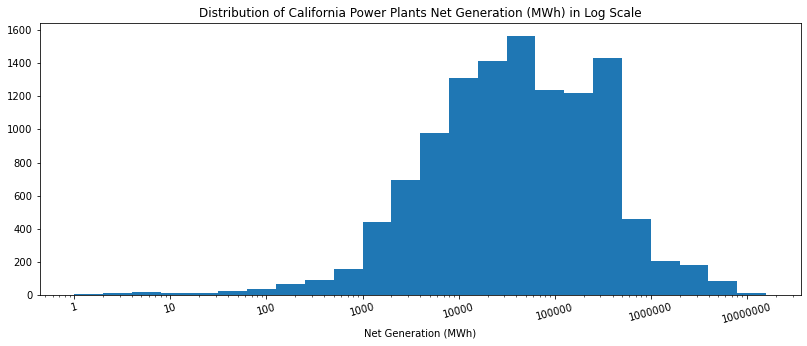

In [7]:
#Generate the x-ticks to apply
ticks = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

bins = 10 ** np.arange(0, 7+0.5, 0.3)
plt.figure(figsize=[30, 5])
plt.subplot(1, 2, 2)
plt.hist(data = cal_plants_clean, x = 'net_generation_mwh', bins=bins)
plt.xlabel('Net Generation (MWh)')
plt.xscale('log')
plt.title('Distribution of California Power Plants Net Generation (MWh) in Log Scale')
plt.xticks(rotation=15)

# Apply x-ticks
plt.xticks(ticks, labels);

### How do the plants vary in capacity?

The plots below shows the distribution of the California power plants nameplate capacity. From this image, it can be deduced that majority of the power plants in  California have capacities ranging from 1 MW to 200 MW. The numbers begin to decline significantly from about 1,000 MW and above.

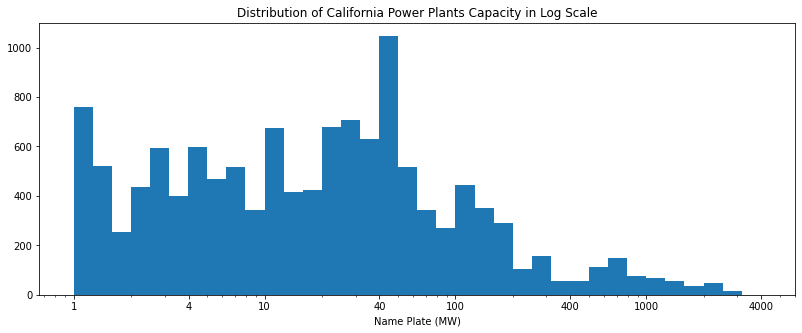

In [12]:

# Generate the x-ticks to apply
ticks = [1, 4, 10, 40, 100, 400, 1000, 4000]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]

bins = 10 ** np.arange(0, 3+0.7, 0.1)
plt.figure(figsize=[29.8, 5])
plt.subplot(1, 2, 2)
plt.hist(data = cal_plants_clean, x = 'nameplate_mw', bins=bins)
plt.xlabel('Name Plate (MW)')
plt.xscale('log')
plt.title('Distribution of California Power Plants Capacity in Log Scale')

# Apply x-ticks
plt.xticks(ticks, labels);

### Categorize the plants

The plot shows that the very small plants consists of about 53%, the small plants are 32%, medium, 11%, large, 3%, and very large, 2%.

Text(0.5, 1.0, 'A Donut Chart of the Percentage Values of Plant Size')

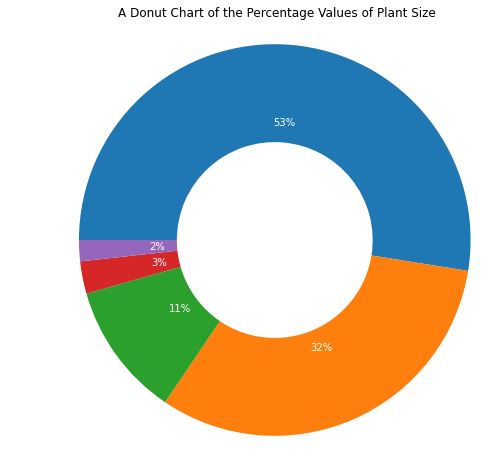

In [8]:
plt.figure(figsize=[12, 8])
sorted_counts = cal_plants_clean['plant_size'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 180,
        counterclock = False, autopct='%1.0f%%',textprops={'color':"w"}, wedgeprops = {'width' : 0.5});
plt.axis('square')

plt.title("A Donut Chart of the Percentage Values of Plant Size")

### How do the numeric variables interact with each other?
All the numeric variables are highly correletad with values as high as 0.994 for relationships between 2 different numeric variables, however, the capacity utilization  has pretty low correlation. This could mean that some of the plants were not utilized as much as they should, or they typically consumed more power from the grid than they generated within the period of review.

Text(0.5, 1.0, 'A Heatmap of all Numeric Variables in the Dataset')

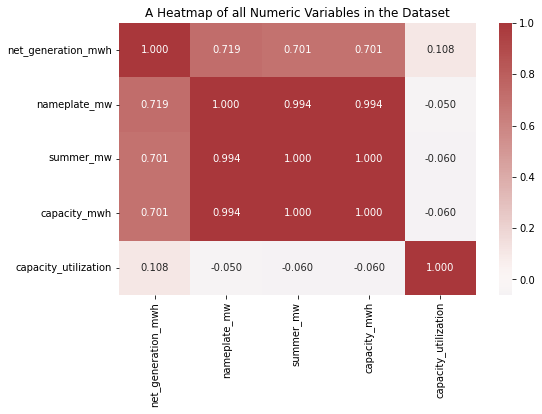

In [14]:
# correlation plot
# convert year to string to prevent it from being included in the correlation plot
cal_plants_clean['year'] = cal_plants_clean['year'].astype(str)

plt.figure(figsize = [8, 5])
sb.heatmap(cal_plants_clean.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag', center = 0)
plt.title("A Heatmap of all Numeric Variables in the Dataset")

### What category of plant got utilized more?
Over all, the very small plants were more utilized than the rest of the plants especially in 2006 and the preceeding years.

Text(0.5, 1.0, 'A Plot of Capacity (MWh) against Year with Plant Size as Categorical Data')

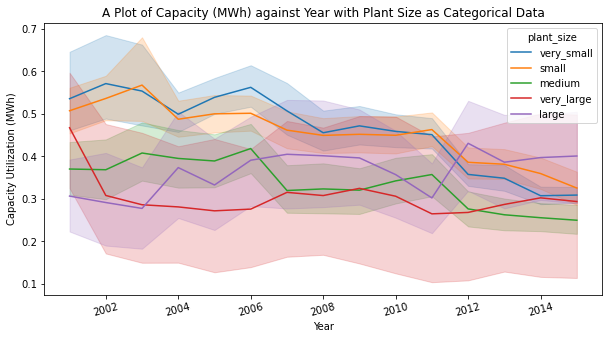

In [9]:
plt.figure(figsize= [10,5])
sb.lineplot(data = cal_plants_clean, x = 'year', y = 'capacity_utilization', hue='plant_size');
plt.xlabel('Year')
plt.ylabel('Capacity Utilization (MWh)')
plt.xticks(rotation=15);
plt.title("A Plot of Capacity (MWh) against Year with Plant Size as Categorical Data")

Thank you for your time.

Any questions?

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 